In [253]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [254]:
rest = pd.read_csv('/Volumes/Database/Research/ozone-budget/result_df_UKESM1_3_0_NN_width_64_dropout_0.1_90.csv')
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(1217).csv')

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [255]:
rest['tas'] = data['tas']
rest['pan'] = data['pan']
rest['photo1d'] = data['photo1d']

rest['o3_mole'] = rest['o3']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['no_mole'] = rest['no']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['no2_mole'] = rest['no2']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['oh_mole'] = rest['oh']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['h2o_mole'] = rest['h2o']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['hno3_mole'] = rest['hno3']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['pan_mole'] = rest['pan']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)

rest['ho2_mole'] = rest['HO₂']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['ch3o2_mole'] = rest['CH₃O₂']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)

rest['k_ho2_ho2'] = 3.0*10**(-13)*np.exp(-460/rest['tas'])
rest['k_no_ho2'] = data['k_no_ho2']
rest['k_no_ch3o2'] = data['k_no_ch3o2']
rest['k_o1d_h2o'] = data['k_o1d_h2o']
rest['k_o3_ho2'] = data['k_o3_ho2']
rest['k_o3_oh'] = data['k_o3_oh']

### A proportion (${\lambda}$) of the O(${^1}$D) formed by the photolysis of O${_3}$ reacts with H${_2}$O to form 2 OH radicals. Here we can estimate the ${\lambda}$ based on steady-state assumption. 

In [281]:
rest['lambda'] = (2*rest['ho2_mole']**2*rest['k_ho2_ho2'])/rest['photo1d']/rest['o3_mole']/2
rest.replace([np.inf, -np.inf], 0, inplace=True)

### Map the geographical distribution of the ${\lambda}$

In [258]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
rest = rest.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
rest = rest.drop(['province','state'], axis=1)

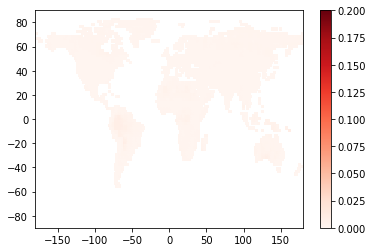

In [282]:
rest['loc'] = rest['longitude']*1000 + rest['latitude']
rest_land = rest.dropna()
rest_land = rest_land[rest_land['latitude'] >= -60]
rest_lambda = rest_land[rest_land['lambda'] < 1]
rest_map = rest_lambda.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = rest_map['longitude']
y = rest_map['latitude']
z = rest_map['lambda']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.2, s=5, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [283]:
rest_lambda['lambda'].describe()

count    232140.000000
mean          0.000955
std           0.001511
min           0.000000
25%           0.000041
50%           0.000327
75%           0.001326
max           0.043587
Name: lambda, dtype: float64